#### EDA

### importing the libraries and dataset

In [ ]:
#imprting of libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns; 
sns.set(color_codes=True)
from sklearn import preprocessing
import tensorflow as tf
import  sklearn.metrics


import warnings
warnings.filterwarnings("ignore")




file_ = '/content/drive/MyDrive/AIDI/archit/data.csv'

##### Checking the shape of the Data (Rows, COlumns)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Checking the shape of the Data (Rows, COlumns)
df = pd.read_csv(file_)
print("Number of rows, columns")
df.shape

Mounted at /content/drive
Number of rows, columns


(57355, 31)

In [ ]:
## Cheking the first 6 rows of the Acquired Data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [ ]:
# Information of the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [ ]:
# Description of the Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [ ]:
## How many null values in the columns of the DataFrame
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
## Counting the number of instances of the classes

df.value_counts()

Time    V1          V2          V3          V4         V5          V6         V7          V8          V9         V10         V11        V12         V13        V14        V15        V16        V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
68207   -13.192671   12.785971  -9.906650    3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711  -0.226074  -6.211557  -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00    1        6
163152  -1.203617    1.574009    2.889277    3.381404   1.538663    3.698747   0.560211   -0.150911    0.124136   4.220998    1.384569  -0.706897   -0.256274  -1.562583   1.692915  -0.787338  -0.226776   -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  

In [ ]:
mean_df=df.describe().loc['mean',:]
mean_df

Time      94577.357074
V1           -0.029092
V2            0.030156
V3           -0.055749
V4            0.035521
V5           -0.022664
V6           -0.006869
V7           -0.032448
V8            0.006142
V9           -0.017667
V10          -0.039325
V11           0.029209
V12          -0.043786
V13          -0.006537
V14          -0.049769
V15          -0.000427
V16          -0.027534
V17          -0.041866
V18          -0.015811
V19          -0.001586
V20           0.000960
V21           0.005569
V22          -0.000265
V23           0.003273
V24           0.001159
V25           0.005003
V26           0.003133
V27           0.000226
V28          -0.000625
Amount       88.825575
Class         0.008578
Name: mean, dtype: float64

In [ ]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:,-1]
print(X)
print("\n\n\n")
print(Y)

         Time        V1        V2        V3        V4        V5        V6  \
0           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
1           2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
2           7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
3          11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
4          12 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
...       ...       ...       ...       ...       ...       ...       ...   
57350  172751  2.085387 -0.033624 -1.706889 -0.015100  0.644669 -0.245303   
57351  172760 -6.713826  2.369104 -3.534768 -0.368259 -1.721030 -1.322808   
57352  172768 -2.076175  2.142238 -2.522704 -1.888063  1.982785  3.732950   
57353  172770  2.007418 -0.280235 -0.208113  0.335261 -0.715798 -0.751373   
57354  172777 -1.266580 -0.400461  0.956221 -0.723919  1.531993 -1.788600   

             V7        V8        V9  ...       V20       V21       V22  \
0

In [ ]:
## Evaluating the Correlaton
X.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.119977,-0.017399,-0.352696,-0.100543,0.167863,-0.058116,0.084012,-0.042149,-0.003066,...,-0.046547,0.036832,0.141055,0.049720,-0.012140,-0.230483,-0.037886,-0.014556,-0.011400,-0.005833
V1,0.119977,1.000000,-0.086351,0.153078,-0.067101,0.138086,0.001046,0.123115,-0.013141,0.077574,...,-0.041505,-0.007392,-0.010103,-0.035463,0.003328,-0.007507,0.001609,-0.002893,0.056163,-0.245310
V2,-0.017399,-0.086351,1.000000,-0.111365,0.067436,-0.038955,-0.044088,-0.168763,0.005245,-0.046573,...,-0.035105,-0.003480,0.000593,-0.022190,-0.007945,0.000316,0.001992,-0.033988,0.069208,-0.537909
V3,-0.352696,0.153078,-0.111365,1.000000,-0.134912,0.171944,0.019712,0.189177,-0.030280,0.113666,...,-0.021601,-0.000326,-0.010128,-0.011467,0.003356,-0.012673,-0.010201,-0.017540,0.034928,-0.216936
V4,-0.100543,-0.067101,0.067436,-0.134912,1.000000,-0.086988,-0.012060,-0.097166,0.004279,-0.082168,...,0.026518,0.009452,0.011813,0.016907,-0.001610,0.000867,0.006343,0.015507,-0.022510,0.116104
V5,0.167863,0.138086,-0.038955,0.171944,-0.086988,1.000000,-0.014674,0.081038,-0.012817,0.069292,...,0.043132,0.026830,-0.014623,0.000783,-0.010292,-0.011716,-0.010784,-0.066874,0.051598,-0.414484
V6,-0.058116,0.001046,-0.044088,0.019712,-0.012060,-0.014674,1.000000,0.081618,-0.056974,0.017235,...,-0.048734,-0.027815,0.005914,0.005094,0.010225,0.005583,0.005635,0.042283,-0.028468,0.256852
V7,0.084012,0.123115,-0.168763,0.189177,-0.097166,0.081038,0.081618,1.000000,-0.007969,0.112508,...,-0.095664,-0.020855,-0.005991,-0.019352,0.006277,0.006784,0.007801,0.106501,-0.054285,0.412073
V8,-0.042149,-0.013141,0.005245,-0.030280,0.004279,-0.012817,-0.056974,-0.007969,1.000000,-0.007670,...,0.004548,0.007773,-0.007414,-0.048759,0.001964,0.012010,-0.000381,0.021235,0.012334,-0.110337
V9,-0.003066,0.077574,-0.046573,0.113666,-0.082168,0.069292,0.017235,0.112508,-0.007670,1.000000,...,-0.019132,0.007610,-0.004363,0.004897,-0.000824,-0.005605,-0.004626,-0.005786,0.000213,-0.048473


Text(237.5, 0.5, 'Features')

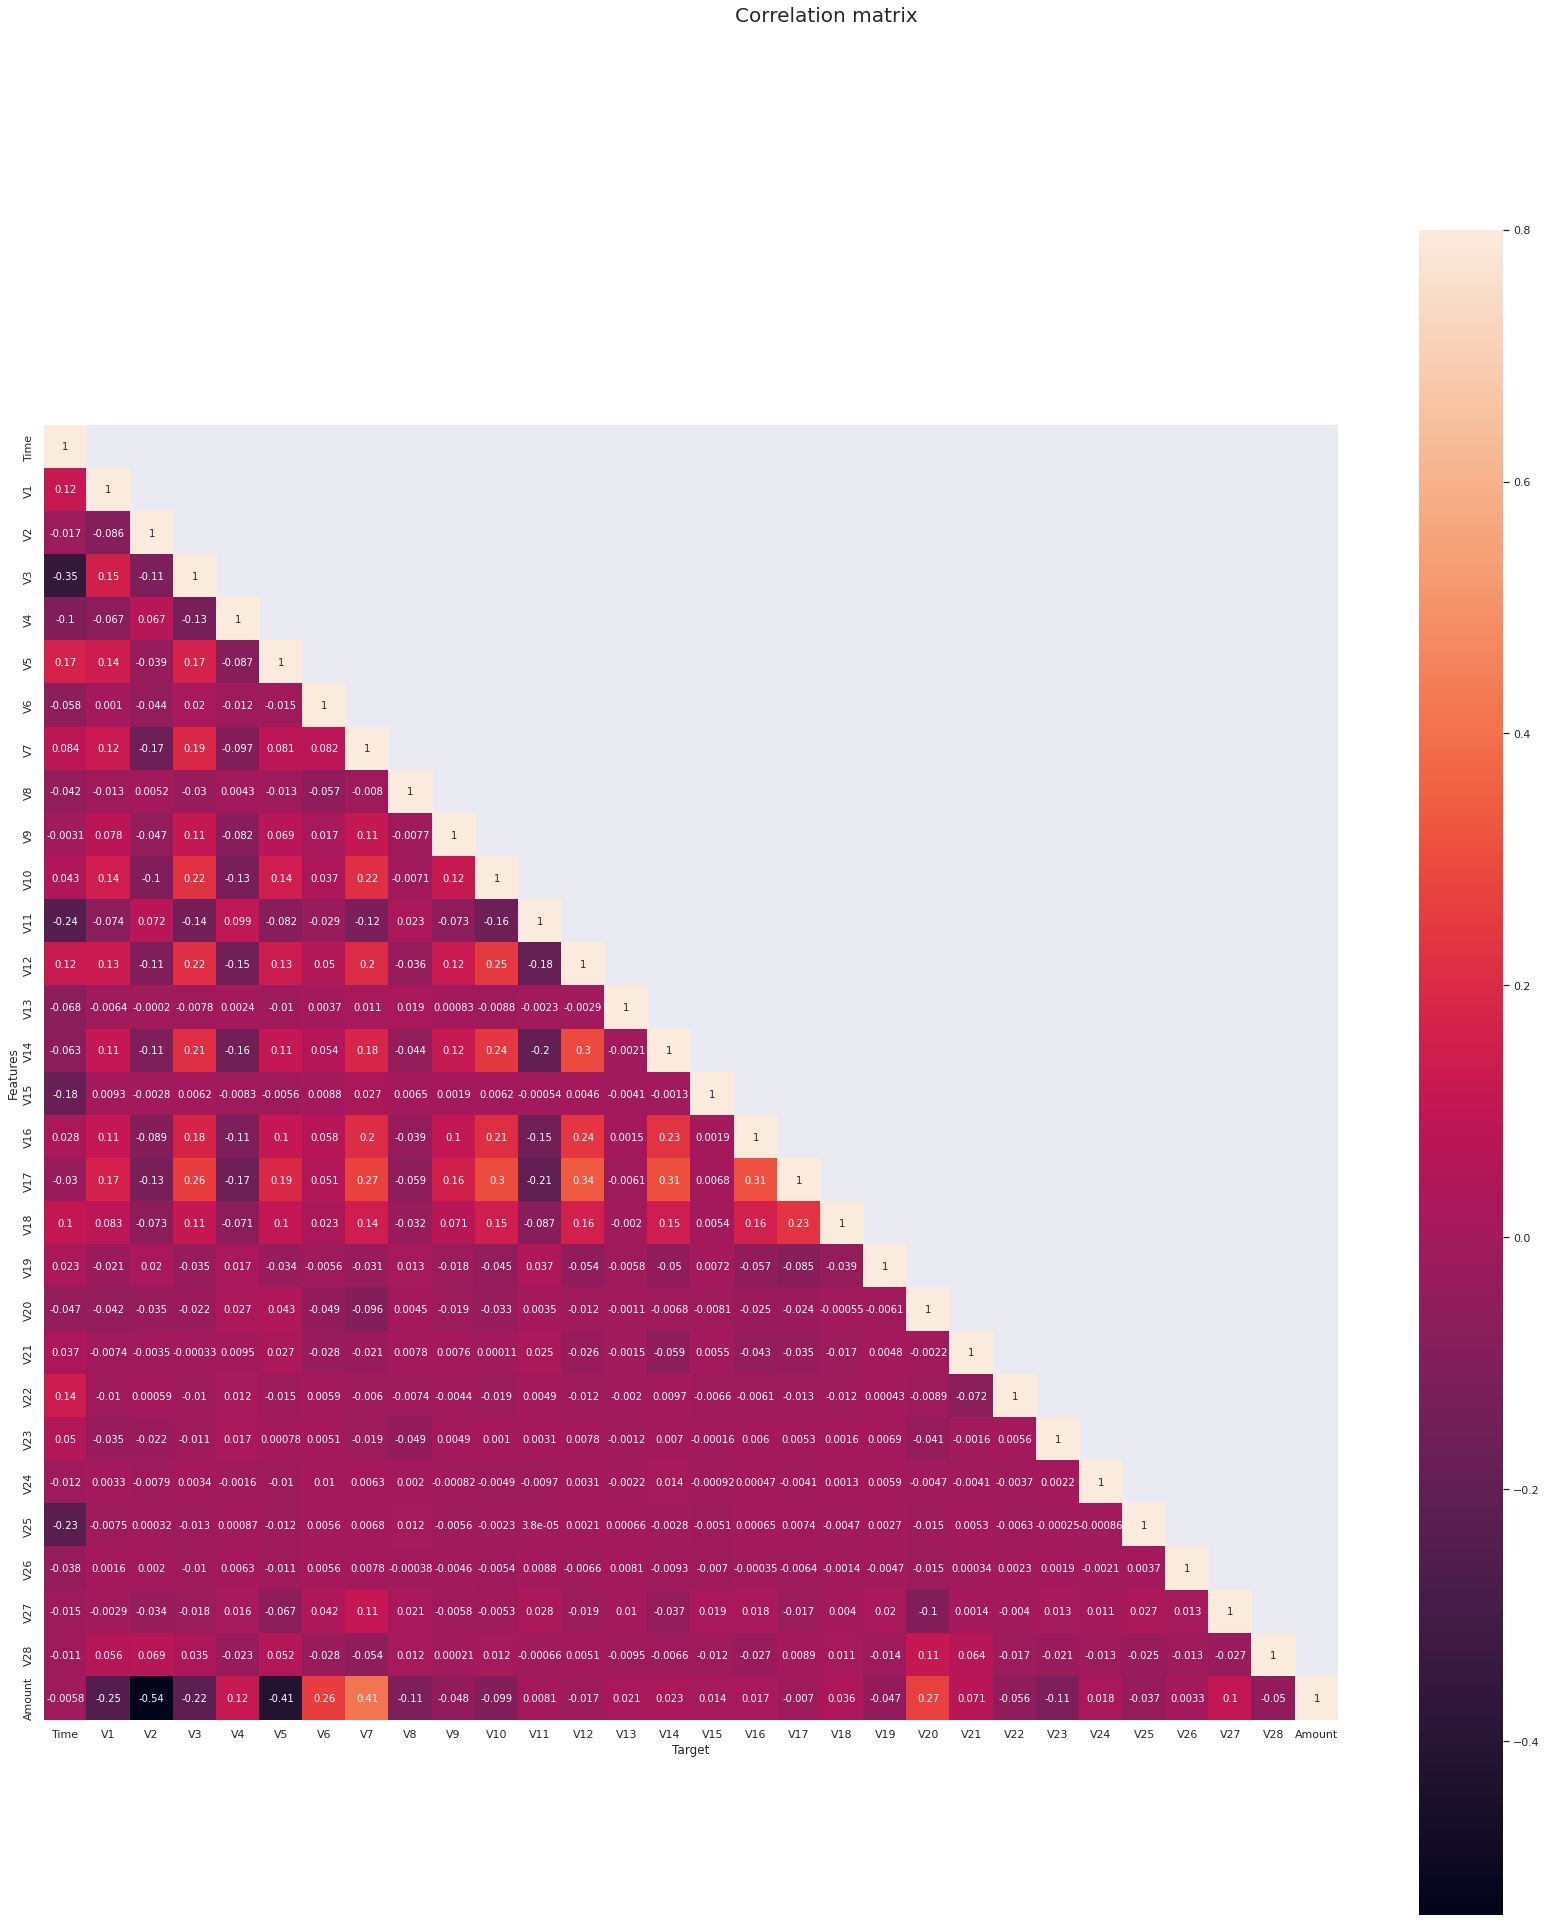

In [ ]:
# Correlation analysis
corrMatt = X.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(29,31)
fig.suptitle('Correlation matrix', fontsize=20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.xlabel('Target')
plt.ylabel('Features')

Co-relation plot shows the relation between the all the avaialable features of matrix. when the 0 means lowest and 1 means biggest co-realtion.

#### 2. implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and **StandardScaler**

Text(0, 0.5, 'Observations')

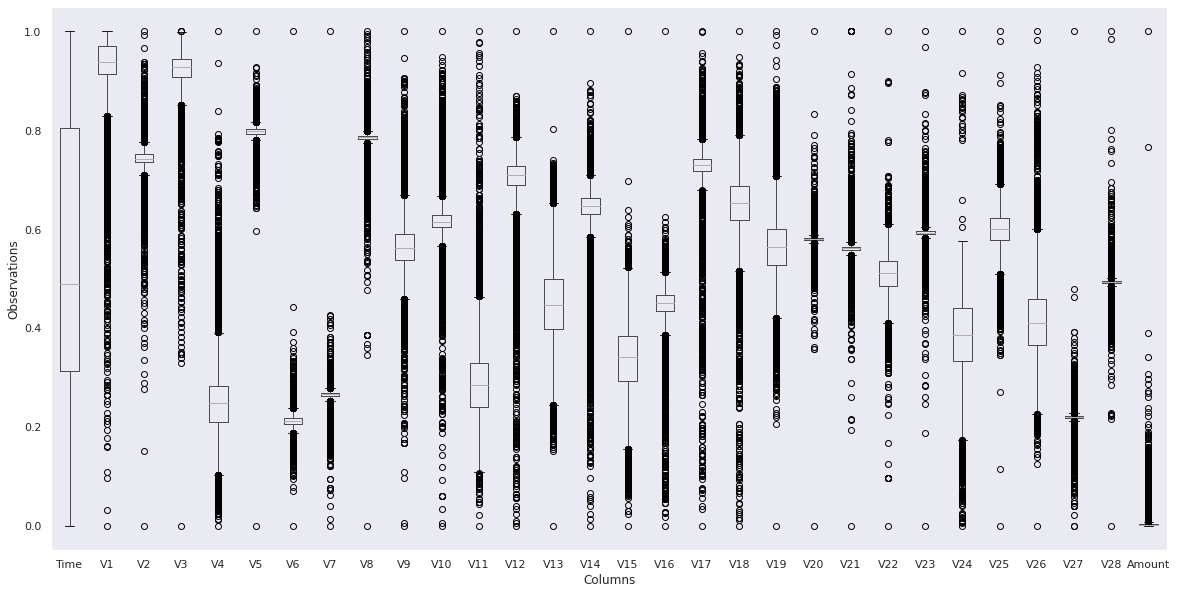

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(X)
X_scale = pd.DataFrame(scaled, columns = [name for name in list(X)])
fig = plt.figure(figsize = (20,10))
X_scale.boxplot(column=[name for name in list(X_scale)], grid=False)
plt.xlabel('Columns')
plt.ylabel('Observations')

This is a box plot 
It is used in explanatory data analysis. 
Box plots visually shows the distribution of numerical observations and skewness by displaying the data quartiles in percentage or in the format of averages trends.


In [ ]:
X_scale.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.907962,0.751998,0.954241,0.266367,0.795308,0.215356,0.268968,0.782484,0.599257,...,0.584615,0.561327,0.547271,0.590554,0.400118,0.584641,0.501782,0.224695,0.499899,0.002724
1,0.000000,0.926615,0.752967,0.946443,0.240674,0.801119,0.214009,0.268257,0.788178,0.540961,...,0.581170,0.558122,0.483915,0.592560,0.330900,0.582797,0.436283,0.225545,0.495615,0.000143
2,0.000029,0.921054,0.758323,0.945166,0.226105,0.804824,0.218917,0.272183,0.744539,0.590748,...,0.578596,0.592809,0.462660,0.594076,0.293330,0.570232,0.410249,0.189469,0.458345,0.001588
3,0.000052,0.964706,0.745089,0.940464,0.370233,0.796913,0.217946,0.264766,0.786630,0.555577,...,0.578634,0.560885,0.513502,0.591747,0.395188,0.636578,0.435982,0.219807,0.493705,0.001070
4,0.000058,0.918299,0.745765,0.963972,0.182191,0.790036,0.213493,0.261648,0.785424,0.546533,...,0.583070,0.569534,0.573179,0.588402,0.372259,0.596132,0.404391,0.214806,0.497159,0.000622


In [ ]:
X_scale.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,0.547390,0.936725,0.742073,0.923543,0.249839,0.798006,0.214254,0.265158,0.785451,0.564130,...,0.580276,0.561569,0.510019,0.593096,0.381203,0.599171,0.419299,0.219281,0.493004,0.003457
std,0.274957,0.052510,0.020037,0.033164,0.066769,0.010584,0.014596,0.009164,0.014310,0.047585,...,0.008754,0.013121,0.034269,0.011295,0.081633,0.035796,0.079729,0.010711,0.010352,0.010879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.312207,0.913836,0.734826,0.906959,0.210490,0.793308,0.206023,0.261955,0.783163,0.537463,...,0.577984,0.557821,0.484780,0.590114,0.333166,0.577332,0.365485,0.217531,0.491341,0.000213
50%,0.489880,0.937873,0.742561,0.927836,0.247987,0.797773,0.211368,0.265574,0.785647,0.562628,...,0.579592,0.561022,0.510249,0.592830,0.386620,0.600306,0.410662,0.219297,0.493381,0.000856
75%,0.805313,0.970940,0.751268,0.944114,0.282613,0.802425,0.218480,0.268784,0.788961,0.590081,...,0.581684,0.564546,0.534722,0.595698,0.440348,0.623105,0.459081,0.221532,0.495533,0.002993
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


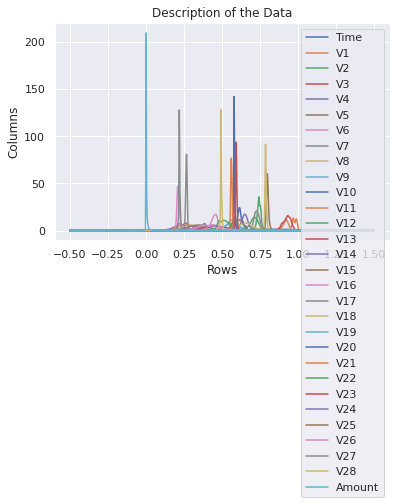

In [ ]:
pd.DataFrame(X_scale).plot(kind='kde')
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title("Description of the Data")
plt.show()

THe above plot is the kernel density estimate (KDE) plot. The KDE is a method for visualizing observations as well as the distribtions in a dataset.
It represents the data using a continuous probability density curve.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf46bc3f90>],
      dtype=object)

<Figure size 720x4320 with 0 Axes>

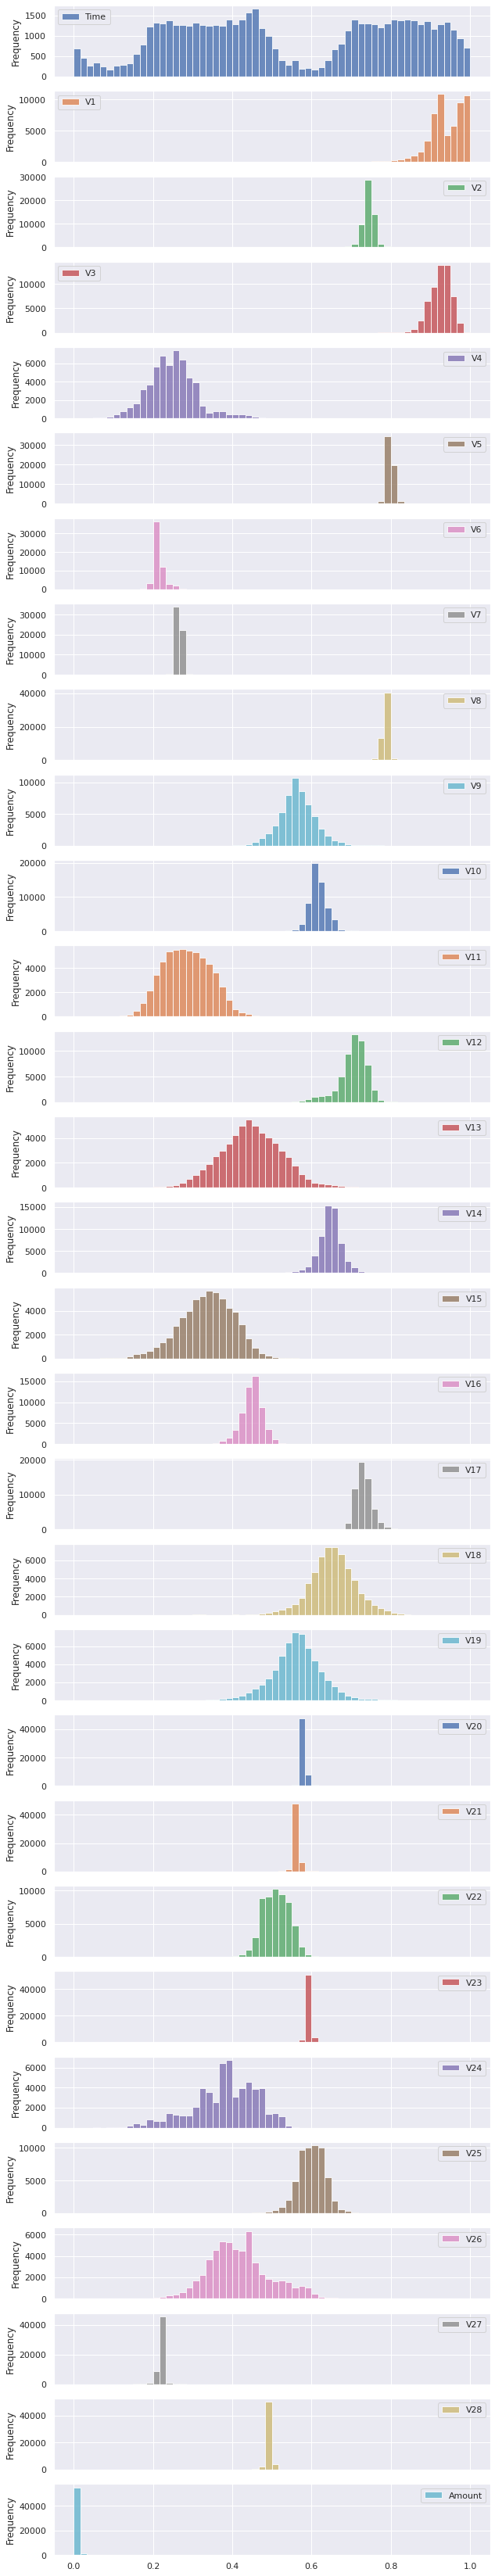

In [ ]:
# Histogram
plt.figure(figsize=(10,60))
X_scale.plot(kind='hist', alpha=0.8,bins=60, xlabel = "4", ylabel = "s", subplots=True,layout=(30,1),legend=True,figsize=(10,60))

the above plot is the histogram of all the acquired columns. 
It shows the data in the each columns ina frequency mannure that how much the data differ in between the same feauture. 

# Deep Learning with PyTorch


### Building a simple neural network

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data.dataset import Dataset
from torch.autograd import Variable


class CCDataset(Dataset):

    def __init__(self, data):
        self.data = data
           
    def __getitem__(self, index):
        item = self.data.iloc[index].values
        return (item[0:28].astype(np.float32), item[28].astype(np.int))

    def __len__(self):
        return self.data.shape[0]


def get_datasets(CC_file, train_ratio=0.80):

    #labels = {'class': label_idx}
    data = pd.read_csv(CC_file)
    #data.replace(labels, inplace=True)
    data = data.drop('Amount', axis=1)
    data = data.drop('Time', axis=1)

    train_df = data.sample(frac=train_ratio, random_state=3)
    valid_df = data.loc[~data.index.isin(train_df.index), :]

    return CCDataset(train_df), CCDataset(valid_df)


def test_valid(CC_file, train_ratio=0.50):
    import copy
    data  = copy.copy(CC_file)

    
    train_df = data(frac=train_ratio, random_state=3)
    valid_df = data.loc[~data.index.isin(train_df.index), :]

    return CCDataset(train_df), CCDataset(valid_df)    

### The Dataset and the challenge

<img src="https://camo.githubusercontent.com/37c5dfc561cbb402706d503622713e864582845187fa9f97800f5751320671b3/68747470733a2f2f65787465726e616c2d636f6e74656e742e6475636b6475636b676f2e636f6d2f69752f3f753d687474707325334125324625324661692d6a6f75726e65792e636f6d25324677702d636f6e74656e7425324675706c6f61647325324632303139253246303625324666726175642d454d562d636869702d6372656469742d636172642e6a706726663d31266e6f66623d31" width="400" >


* The dataset is the Kaggle Credit Card Fraud Detection dataset here. It contains transactions data there were made on 09/2013 by European cardholders. It has 492 frauds out of 284,807 transactions. Thus, it is highly unbalanced, with the positive (frauds) accounting for only 0.17%.

Users can findthat it has numerical observations. Features V1, V2, … V28 are the principal components obtained with PCA transformation. 
The only features which have not been transformed are ‘Time’ and ‘Amount’.
<br> ‘Amount’ is the transaction amount. 
<br> ‘Class’ is the response variable with 1 as fraud and 0 otherwise.
<br> ‘Time’ is the seconds elapsed between each transaction and the first. 

* Download: [Data Source](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### Let's check a few rows of data from the raw file

### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [ ]:
class CCNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size,  num_classes):
        
        super(CCNet, self).__init__()
        self.fc1    = nn.Linear(input_size, hidden1_size) # 29, 
        self.relu1  = nn.ReLU()
        self.fc2    = nn.Linear(hidden1_size, hidden2_size)
        self.relu2  = nn.ReLU()
        
        self.fc3    = nn.Linear(hidden2_size, num_classes)  
        
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
             
        out = self.fc3(out)
        
        return out

**Print the module**

In [ ]:
net  = CCNet(28, 100, 154, 2)
print(net)

CCNet(
  (fc1): Linear(in_features=28, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=154, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=154, out_features=2, bias=True)
)


### Create the DataLoader

In [ ]:
batch_size = 28
CC_data_file = '/content/drive/MyDrive/AIDI/archit/data.csv'

# Get the datasets
train_ds, valid_ds = get_datasets(CC_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in validation set: ', len(valid_ds))

# Create the dataloaders - for training and validation/validing
# We will be using the term validation and validing data interchangably
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
valid_loader  = torch.utils.data.DataLoader(dataset=valid_ds, batch_size=batch_size, shuffle=True)

# instances in training set:  45884
# instances in validation set:  11471


### Instantiate the network, the loss function and the optimizer

In [ ]:
# Our model
#net = CCNet(28, 100, 50, 2)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

### Train it!

Streaming output truncated to the last 5000 lines.
Epoch 162/165, Iteration 1557/1638, Loss: 0.0001
Epoch 162/165, Iteration 1558/1638, Loss: 0.0001
Epoch 162/165, Iteration 1559/1638, Loss: 0.0002
Epoch 162/165, Iteration 1560/1638, Loss: 0.0003
Epoch 162/165, Iteration 1561/1638, Loss: 0.0002
Epoch 162/165, Iteration 1562/1638, Loss: 0.0002
Epoch 162/165, Iteration 1563/1638, Loss: 0.0002
Epoch 162/165, Iteration 1564/1638, Loss: 0.0004
Epoch 162/165, Iteration 1565/1638, Loss: 0.1521
Epoch 162/165, Iteration 1566/1638, Loss: 0.0003
Epoch 162/165, Iteration 1567/1638, Loss: 0.0013
Epoch 162/165, Iteration 1568/1638, Loss: 0.0001
Epoch 162/165, Iteration 1569/1638, Loss: 0.0005
Epoch 162/165, Iteration 1570/1638, Loss: 0.0001
Epoch 162/165, Iteration 1571/1638, Loss: 0.0006
Epoch 162/165, Iteration 1572/1638, Loss: 0.0001
Epoch 162/165, Iteration 1573/1638, Loss: 0.0002
Epoch 162/165, Iteration 1574/1638, Loss: 0.0001
Epoch 162/165, Iteration 1575/1638, Loss: 0.0001
Epoch 162/165, Ite

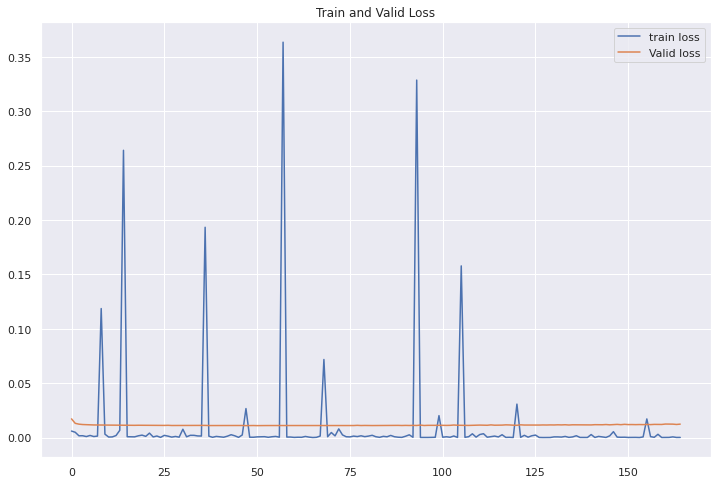

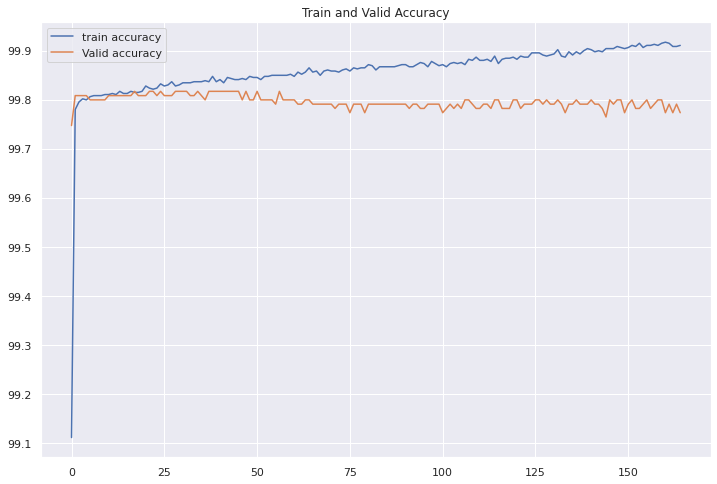

In [ ]:
num_epochs = 165

train_loss = []
valid_loss = []
train_accuracy = []
valid_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items.float())
        classes = Variable(classes.long())
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data)

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the valid set (the unseen set)
    # Record the correct predictions for valid data
    valid_items = torch.FloatTensor(valid_ds.data.values[:, 0:28])
    valid_classes = torch.LongTensor(valid_ds.data.values[:, 28])

    outputs = net(Variable(valid_items))
    loss = criterion(outputs, Variable(valid_classes))
    valid_loss.append(loss.data)
    _, predicted = torch.max(outputs.data, 1)
    total = valid_classes.size(0)
    correct = (predicted == valid_classes).sum()
    valid_accuracy.append((100 * correct / total))

fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(valid_loss, label='Valid loss')
plt.title("Train and Valid Loss")
plt.legend()
plt.show()

fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(valid_accuracy, label='Valid accuracy')
plt.title("Train and Valid Accuracy")
plt.legend()
plt.show()


Here, the above has two plots. 
<p>
THe one is training vs validation modeling of the data and the another graph is the accuracy of the traning and validation data. 

the loss plot shows that the loss lies in the range from 0.002 to 0.0034.

Similalry, the Accuracy plot of the traning and validation depicts that the accuracy is more 99% in the whole experiement. 
The traning accuracy is 99.10% in the intial phase and it moves upward to 99.9 percent and the Validation accuracy has the average of 99.8 percent. 



Plot loss vs iterations

### Conculsion:
<p>
The dataset is loaded from the kaggle, 
It has a 29 columns of the required indepdendent features while 1 feature shows about the authentcity of the users where 0 means they are authetic peple while the 1 is used to defiend the fruod people. 
These acquired observations then analysed with the EDA tools for the better analysis of the data and the plots. 

In the experiement, Data set from the Kaggle is downloaded. Some of the EDA methods are applied and the dataset is processed and labelled. 
These proceesed data are plotted and visualuised using pair wise plot, Histogram and the bar plot. 
After making the processed data, we are ready for the modeling of the of the detection of the credit card fraud.

In the first modeling, a matrix of the features is created. the the model is builtltd with the training and validation ratio of 80:20 as well as the training and the evaluation of the model.
THe estimator model make an accuracy of more than 60 percetile. 

In the experiment, we first build the PyTorch model. 
the model has 3 different hidden layers including an input layer. All of these layers have the Relu function.  these Relu functions are connected with every node of the neural network for Py-Toruch. these 3 layers have a different number of neurons. Even, the number of multiple attempts are made for the best number of neurons along with the optimal number of layers. The number of neurons in each layer is 28, 100, and 154 respectively.The final selection of these neurons is made in the experiment after having several hits and trails. 
The following layer is the Output layer. It has 2 units of neurons because we have 2 classes in the feautre.

In the experiment, we pass the learning rate of 0.001 for the best performance of the model as well as outweigh the noise and bias. 
The number of epochs in the experiment is 165, then the model runs for several minutes. 











